## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 10 : Algoritma Hierarki </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Nisaul Fadhilah"
myNIM = "00000060236"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Nisaul Fadhilah
NIM: 		00000060236
Start: 		2023-11-09 13:32:20.656772
Device ID: 	bc3ae92e-7ec9-11ee-8710-2c3b70a37f3c



---

### Dataset yang dipakai:

1. Fish.csv – sumber : [cantumkan link dataset1]
2. Stars – sumber : [cantumkan link dataset2]

---

### Hasil kerja

#### Importing system library

In [3]:
import sys

#### Importing numpy library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('Stars.csv')

In [48]:
df.shape

(240, 7)

In [49]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [51]:
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [52]:
df.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [54]:
numerical = ['Temperature', 'L', 'R', 'A_M', 'Type']
categorical = ['Color', 'Spectral_Class']

In [55]:
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode().values[0])

In [56]:
df.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


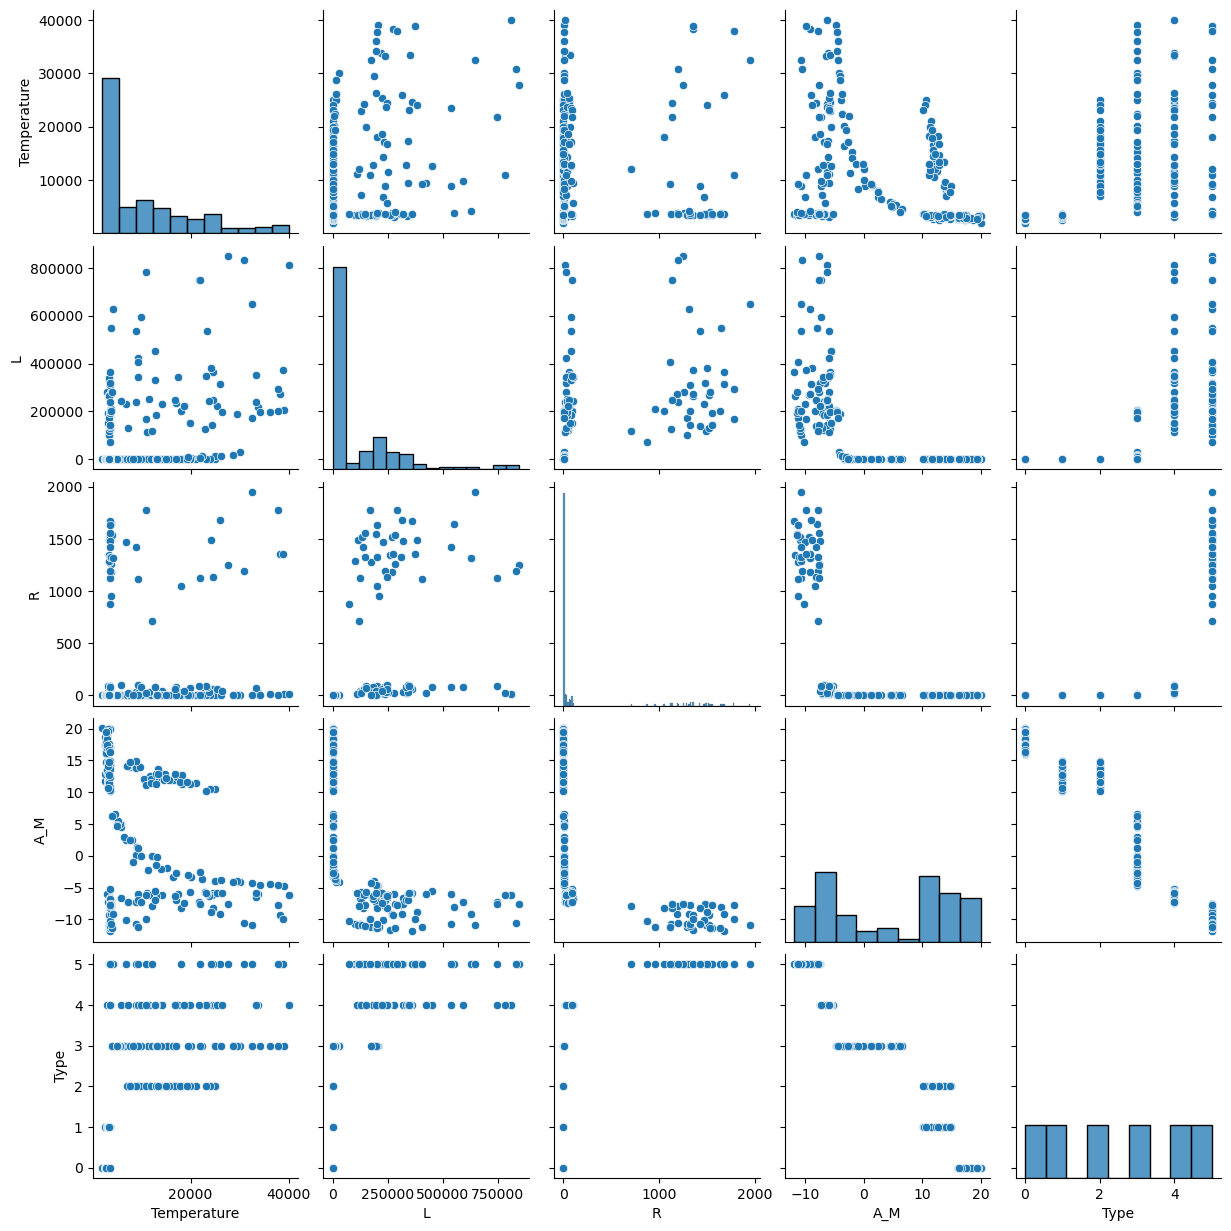

In [57]:
sns.pairplot(df)

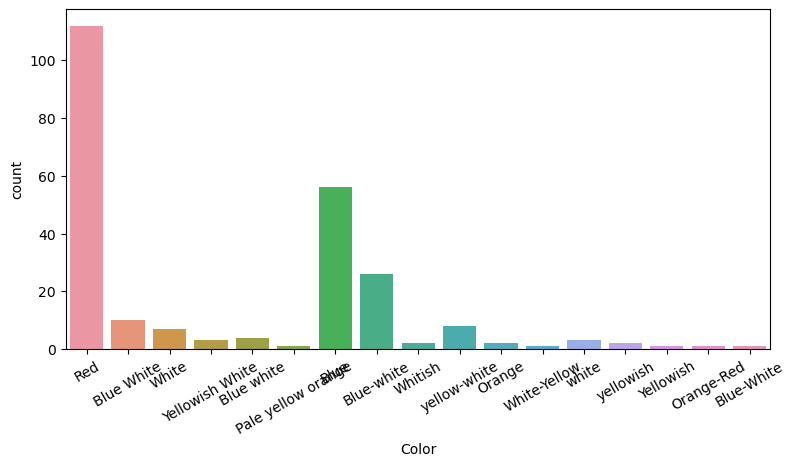

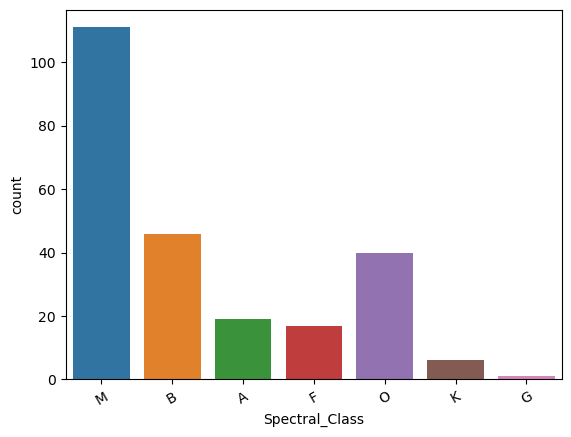

In [58]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df, x = cat)
    plt.xticks(rotation=30)
    plt.show()

In [59]:
# Hapus kolom non-numerik
df_numeric = df.select_dtypes(include=[np.number])

# Hitung korelasi pada DataFrame baru
corr = df_numeric.corr(method='pearson')


<Axes: >

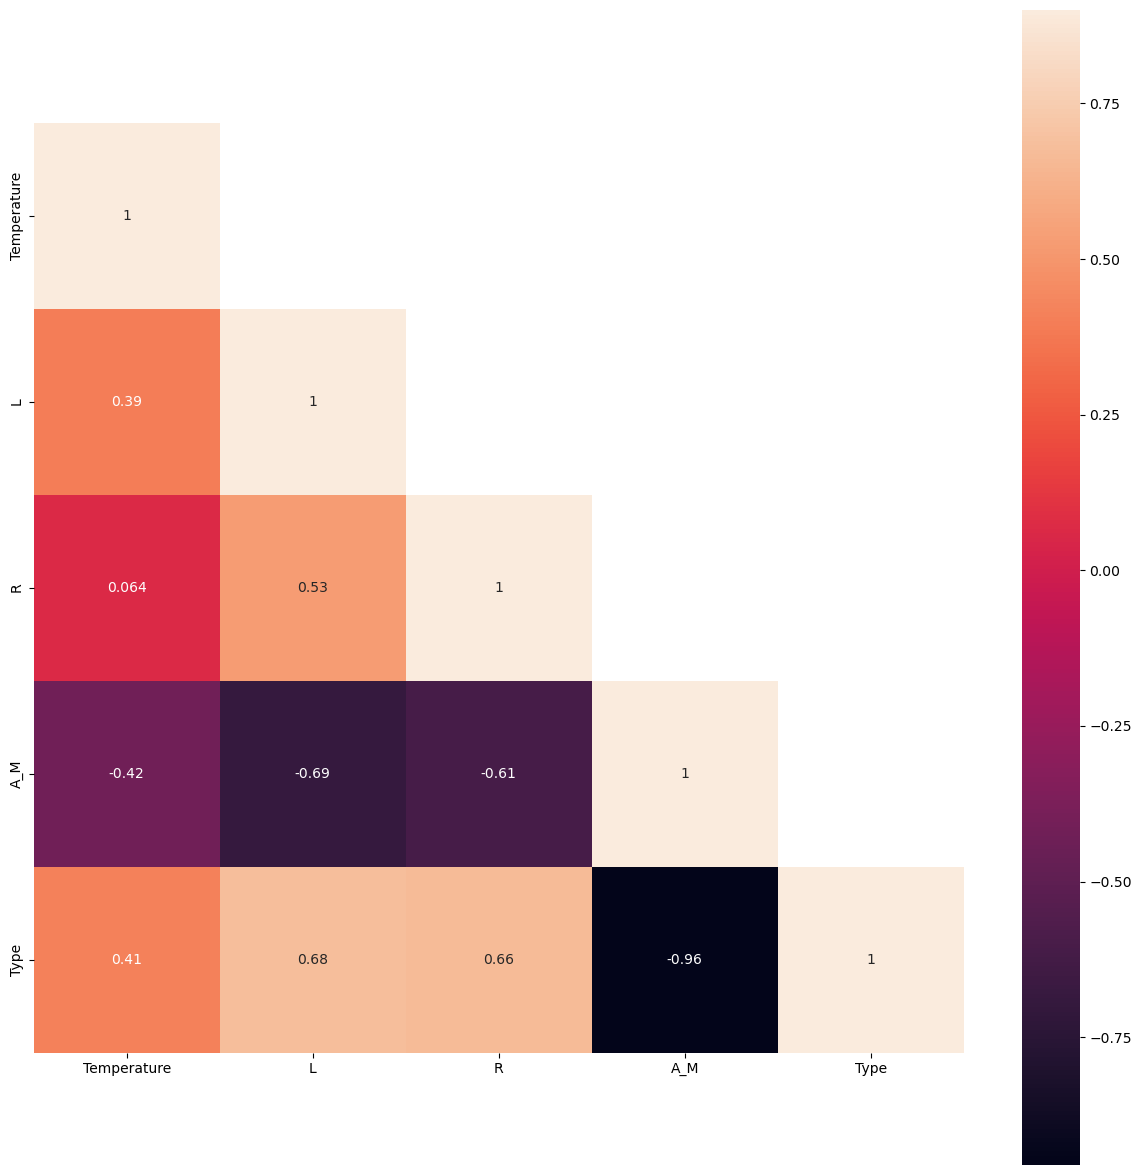

In [60]:
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

In [62]:
df_cluster = pd.DataFrame()
df_cluster['Temperature'] = df['Temperature']
df_cluster['L'] = df['L']
df_cluster['R'] = df['R']
df_cluster['A_M'] = df['A_M']
df_cluster['Type'] = df['Type']
df_cluster.head()


,Temperature,L,R,A_M,Type
0,3068,0.002400,0.1700,16.12,0
1,3042,0.000500,0.1542,16.60,0
2,2600,0.000300,0.1020,18.70,0
3,2800,0.000200,0.1600,16.65,0
4,1939,0.000138,0.1030,20.06,0


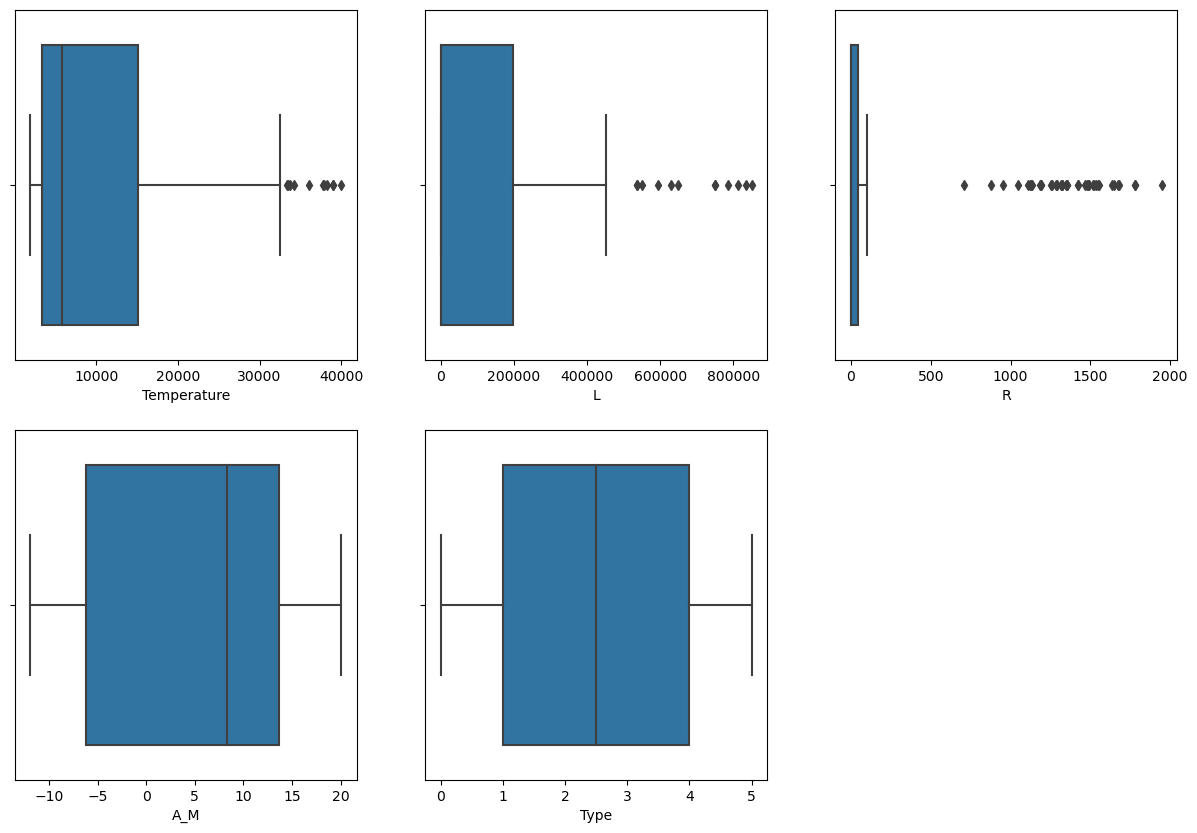

In [65]:
fig = plt.figure(figsize = (15, 10))
axes = 230
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = df, x = num)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_21204\3383347751.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["L"], ax=ax1)
C:\Users\hp\AppData\Local\Temp\ipykernel_21204\3383347751.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Temperature"], ax=ax2)
C:\Users\hp\AppData\Local\Temp\i

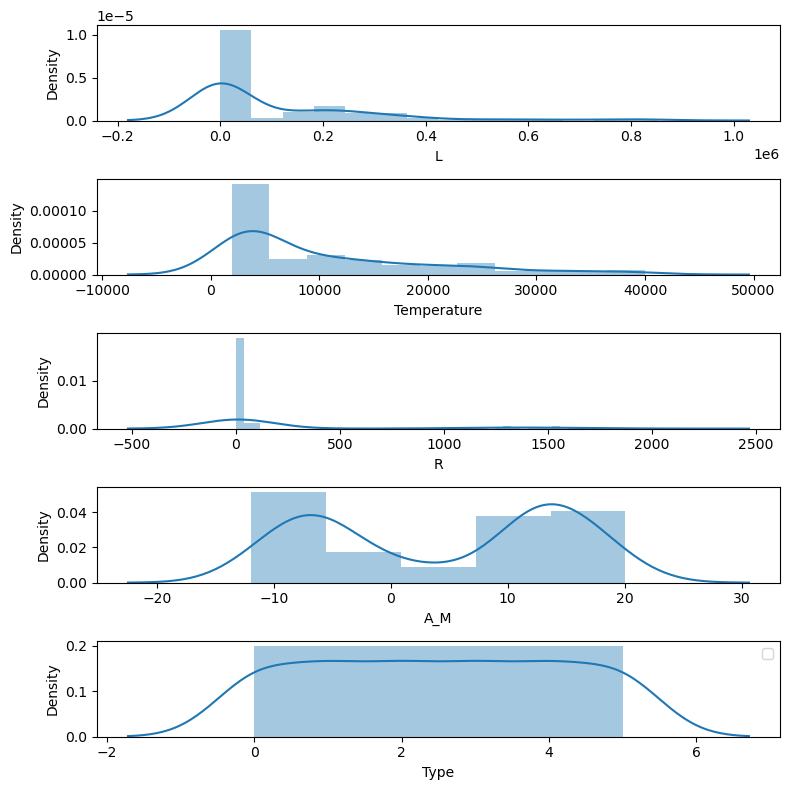

In [68]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize = (8,8))
sns.distplot(df["L"], ax=ax1)
sns.distplot(df["Temperature"], ax=ax2)
sns.distplot(df["R"], ax=ax3)
sns.distplot(df["A_M"], ax=ax4)
sns.distplot(df["Type"], ax=ax5)
plt.tight_layout()
plt.legend()


C:\Users\hp\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\hp\AppData\Local\Temp\ipykernel_21204\639635855.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cluster_log["L"], ax=ax1)
C:\Users\hp\AppData\Local\Temp\ipykernel_21204\639635855.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to

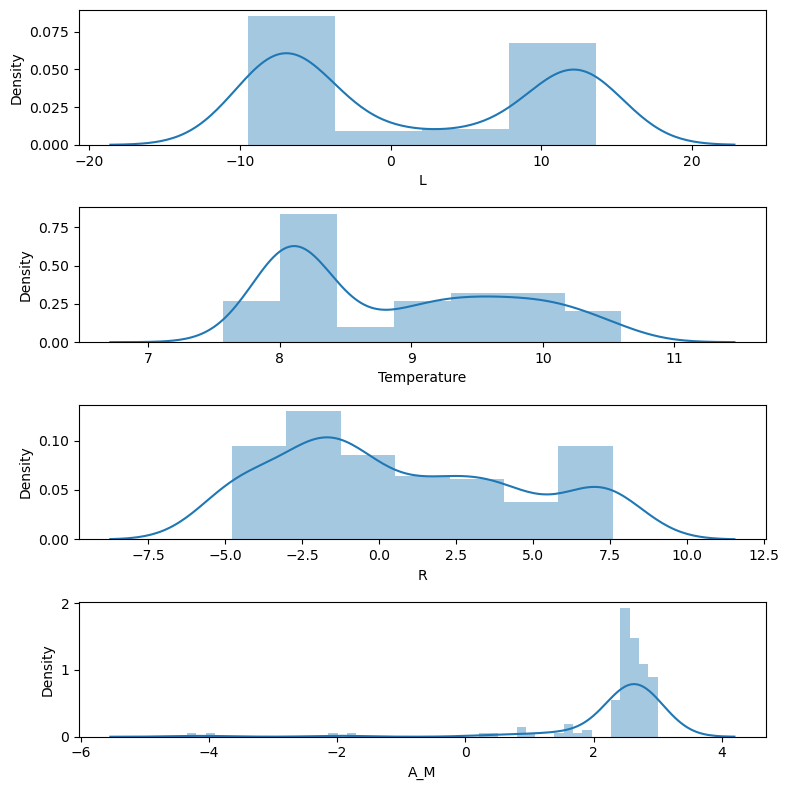

In [69]:
df_cluster_log = np.log(df_cluster[['L', 'Temperature', 'R', 'A_M']])

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(8,8))
sns.distplot(df_cluster_log["L"], ax=ax1)
sns.distplot(df_cluster_log["Temperature"], ax=ax2)
sns.distplot(df_cluster_log["R"], ax=ax3)
sns.distplot(df_cluster_log["A_M"], ax=ax4)
plt.tight_layout()

In [70]:
df_cluster_log.head()

,L,Temperature,R,A_M
0,-6.032287,8.028781,-1.771957,2.780061
1,-7.600902,8.020270,-1.869505,2.809403
2,-8.111728,7.863267,-2.282782,2.928524
3,-8.517193,7.937375,-1.832581,2.812410
4,-8.888257,7.569928,-2.273026,2.998728


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster_log)

In [76]:
import numpy as np

# Ganti semua nilai NaN dengan 0
cluster_scaled = np.nan_to_num(cluster_scaled)

# Atau hapus baris/kolom dengan NaN
cluster_scaled = cluster_scaled[~np.isnan(cluster_scaled).any(axis=1)]


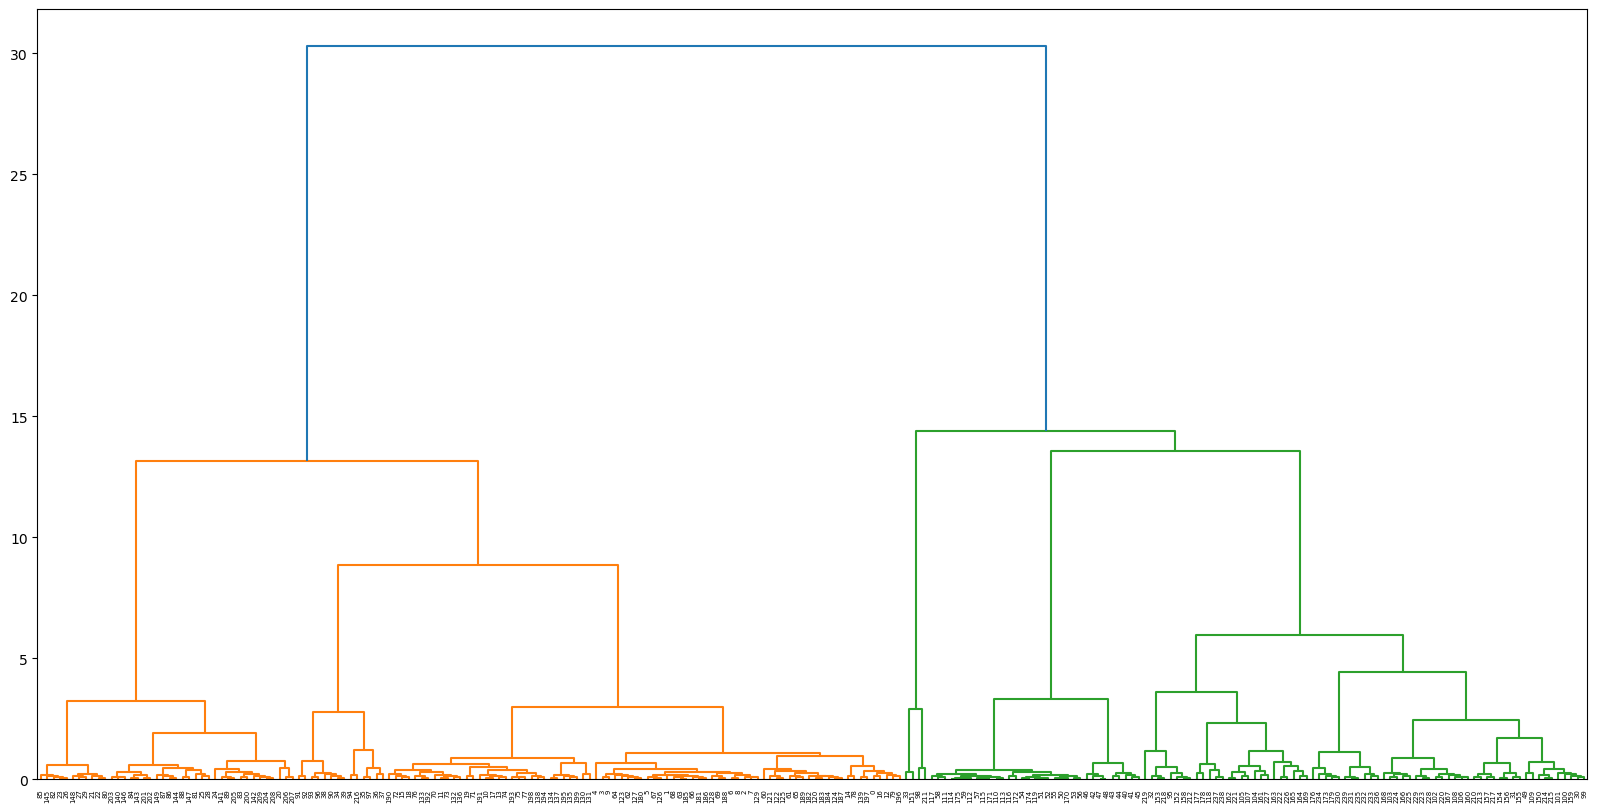

In [77]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))

Hierachical Agglomerative Clustering


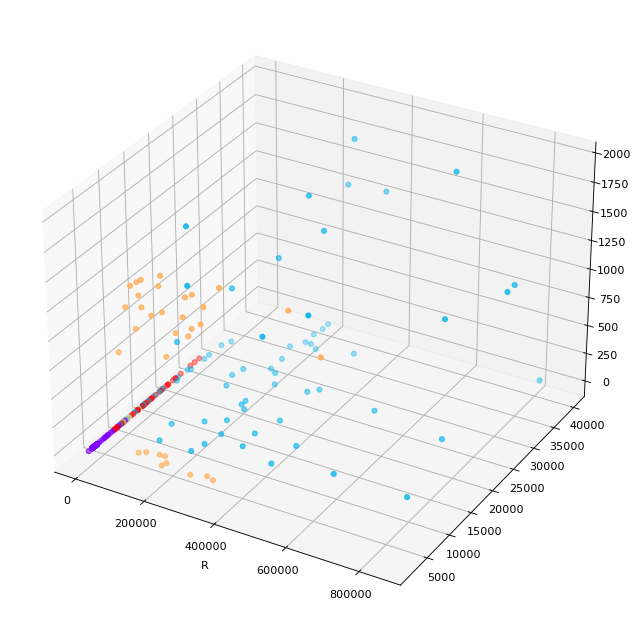

In [79]:
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D

model = AgglomerativeClustering(n_clusters=5)
model.fit(cluster_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15,10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection = "3d")
              
ax.scatter3D(df_cluster['L'], df_cluster['Temperature'], df_cluster['R'], c=hac_labels, cmap='rainbow')
              
              
xLabel = ax.set_xlabel('L', linespacing=3.2)
xLabel = ax.set_xlabel('Temperature', linespacing=3.1)
xLabel = ax.set_xlabel('R', linespacing=3.4)
print("Hierachical Agglomerative Clustering")

In [80]:
df_clustered_hac = df_cluster.assign(Cluster=hac_labels)
grouped_hac = df_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,Temperature,L,R,A_M,Type
Cluster,,,,,
0,3615.4,1.0,0.4,13.4,0.9
1,21202.0,260779.1,342.5,-6.0,3.9
2,10188.8,338.2,4.6,0.1,3.0
3,3593.8,234242.4,1007.1,-9.0,4.7
4,13931.4,0.0,0.0,12.6,2.0


In [81]:
#The dendogram using wholesaleCustomer dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
data = pd.read_csv('Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [86]:
# Misalkan df adalah DataFrame Anda
data = data.drop(data.columns[0], axis=1)

In [87]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Weight,Length1,Length2,Length3,Height,Width
0,0.981470,0.094091,0.103014,0.121670,0.046721,0.016304
1,0.985942,0.081595,0.089415,0.106074,0.042429,0.014638
2,0.989711,0.069571,0.077139,0.090529,0.036031,0.013670
3,0.989406,0.071684,0.079043,0.091309,0.034697,0.012144
4,0.992301,0.061153,0.066923,0.078461,0.028717,0.011848


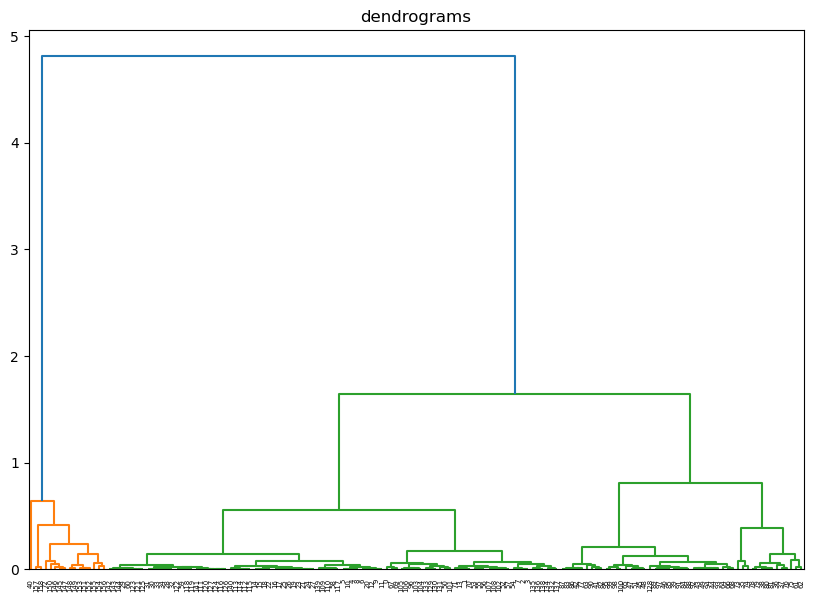

In [88]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

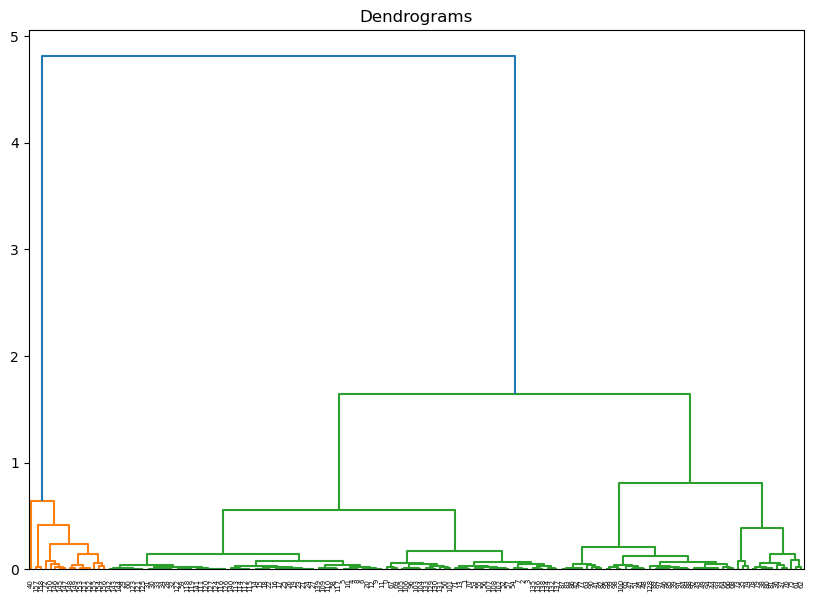

In [89]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [90]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

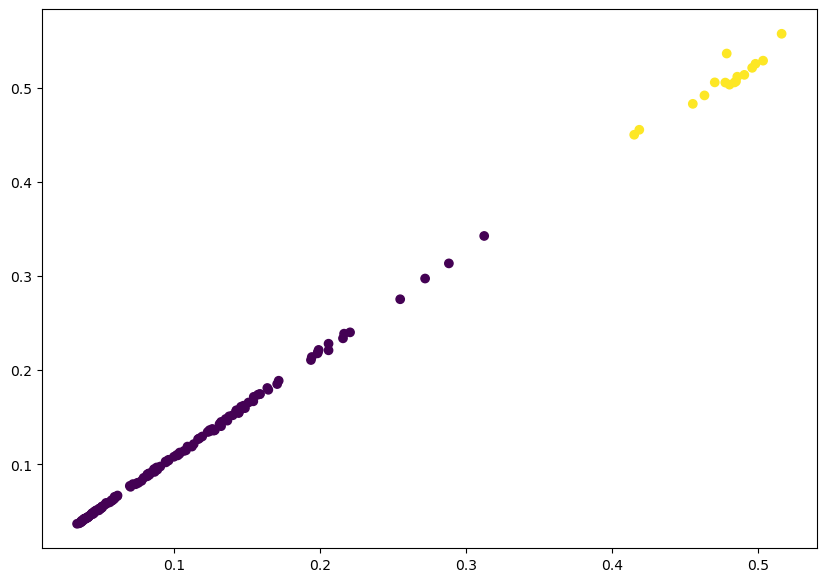

In [91]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Length1'], data_scaled['Length2'], c=cluster.labels_)

---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Pada plot densitas dataset Stars.csv, colom L menunjukkan terdapat 2 custer data yang persebarannya normal pada angka 10 dan -10. sedangkan pada colom Temperature terdapat 2 cluster yang salah satunya sangat menyebar yang puncaknya antara 9 dan 10 dan satu lainnya titik tengahnya pada angka delapan
    
    
    - Dendogram dataset Stsr.csv menunjukkan bahwa tampaknya ada tiga cabang utama, yang masing-masing mewakili klaster. Cabang biru memiliki dua sub-cabang, yang masing-masing mewakili sub-klaster. Cabang oranye dan hijau masing-masing memiliki beberapa sub-cabang, yang masing-masing juga mewakili sub-klaster
    
    - pada dataset Fisch.csv terdapat tiga cabang utama, yang masing-masing mewakili klaster. Cabang biru memiliki dua sub-cabang, yang masing-masing mewakili sub-klaster. Cabang oranye dan hijau masing-masing memiliki beberapa sub-cabang, yang masing-masing juga mewakili sub-klaster
    
    - Pada dataset Fish.csv colom Length1 dan Length2 memiliki korelasi yang positive

---

In [3]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Nisaul Fadhilah
NIM: 		00000060236
Time-stamp:	2023-11-09 13:32:26.854005


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [92]:
!jupyter nbconvert --to html "./IF540L_Kelas_EL_laporan_M10_00000060236_Nisaul Fadhilah.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540L_Kelas_EL_laporan_M10_00000060236_Nisaul Fadhilah.ipynb to html
[NbConvertApp] Writing 1415336 bytes to IF540L_Kelas_EL_laporan_M10_00000060236_Nisaul Fadhilah.html
